In [1]:
!pip install wget unidecode
!pip install transformers
!pip install spacy

!python -m spacy download es_core_news_sm 'es_core_news_sm'

You should consider upgrading via the '/home/ricardo/anaconda3/envs/whalejaguar/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ricardo/anaconda3/envs/whalejaguar/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/home/ricardo/anaconda3/envs/whalejaguar/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 12.9 MB 5.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ricardo/anaconda3/envs/whalejaguar/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [2]:

#some libraries from https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

#library that contains punctuation

def remove_punctuation(text):
    import string

    punctuationfree="".join([i if i not in string.punctuation else ' ' for i in text])
    return punctuationfree

def count_punctuation(text):
    from numpy import sum
    count = 0
    punctuationfree=[len(i)+count for i in text if i in string.punctuation]
    return sum(punctuationfree)


def remove_hashs(text):
    import re
    raw_tweet = ' '.join(re.sub("(#[A-Za-z0-9_]+)|(\w+:\/\/\S+)"," ",text).split())
    return raw_tweet

def separate_users(text):
    import re
    raw_tweet = ' '.join(re.findall("(@[A-Za-z0-9_]+)" ,text))
    return raw_tweet


def separate_hashtags(text):
    import re
    raw_tweet = ' '.join(re.findall("(#[A-Za-z0-9]+)", text))
    return raw_tweet
def separate_urls(text):
    import re
    raw_tweet = ' '.join(re.findall("(https?://\S+|www\.\S+)", text))
    return raw_tweet
r'https?://\S+|www\.\S+'


def remove_users(text) :
    import re
    raw_tweet = ' '.join(re.sub("(@[A-Za-z0-9_]+)"," ",text).split())
    return raw_tweet
    #data['msg_lower'] = data['clean_msg'].apply(lambda x: x.lower())

def remove_hashtags(text):
    import re
    raw_tweet = ' '.join(re.sub("(#[A-Za-z0-9]+)", " ", text).split())
    return raw_tweet
    # data['msg_lower'] = data['clean_msg'].apply(lambda x: x.lower())

def remove_hash_symbol(text):
    import re
    raw_tweet = ' '.join(re.sub("(#)", "", text).split())
    return raw_tweet

def remove_at_symbol(text):
    import re
    raw_tweet = ' '.join(re.sub("(@)", "", text).split())
    return raw_tweet

    import nltk
    nltk.download('stopwords')
def remove_stopwords(text):
    import nltk
   # nltk.download('stopwords')
    stopword = nltk.corpus.stopwords.words('spanish')
    text = ' '.join([word for word in text.split() if word not in stopword])
    return text

def Separate_hashtag_words(s):
    import re
    return ' '.join(re.split(r'(?=[A-Z])', s))

def Separate_at_words(s):
    import re
    return ' '.join(re.split(r'(?=[A-Z])', s))



#def separate_hash(text):
  #  text = ' '.join([word for word in text.split() if word not in stopword])


def lemmatization(text):
  #ToDo: try other lemma Stanford CoreNLP or FreeLing. 
  
    import spacy
    import es_core_news_sm
    nlp = es_core_news_sm.load()
   # nlp = spacy.load("es_core_news_sm")
    doc = nlp(text)
    Lemma = doc[:].lemma_
    return Lemma


def Build_dictionary(data):
    import pandas as pd
    data = pd.DataFrame(data)
    import unidecode

    from nltk.stem.porter import PorterStemmer
#    dataC = ' '.join(data.to_list())
    data['copy'] = data['text']
    data['text'] = data['text'].apply(lambda x: remove_hashs(x))
    data['text'] = data.text.apply(lambda x: unidecode.unidecode(x))
    data['text'] = data['text'].apply(lambda x: remove_users(x))

    stemmer = PorterStemmer()
    data['text'] = data.text.apply(lambda x: stemmer.stem(x))  # to remove s (to singular)
#    data['text4'] = data.text.apply(lambda x: remove_stopwords(x))  # remove stop words, english and spanish
    data["text"] = data["text"].str.replace(r'https?://\S+|www\.\S+', ' ').str.strip()  # to delete all URLS
    data["text"] = data["text"].str.replace(r'\n', ' ').str.strip()  # to delete all '\n'
    data['text'] = data['text'].apply(lambda x: x.lower())
    # data['text'] = data.text.apply(lambda x: re.split('@\/\/*', str(x))[0]) # to delete all URLS
    all_words = ' '.join(data.text.to_list()).split()
    import tensorflow as tf
    from tensorflow.keras.preprocessing.text import Tokenizer
    tokenizer = Tokenizer(num_words=1000,oov_token="<OOV>",char_level=True)
    tokenizer.fit_on_texts(all_words)
    word_index = tokenizer.word_index
    Tokens_words = tokenizer.texts_to_sequences(all_words)
    maxlen = 0
    for i in range(len(Tokens_words)):
        if len(Tokens_words[i]) > maxlen:
            maxlen = len(Tokens_words[i])
            idx_large = i
            print(all_words[idx_large])


    Tokens_padded = tf.keras.preprocessing.sequence.pad_sequences(Tokens_words, maxlen=19, padding='post')
    from sklearn_extra.cluster import KMedoids
    import numpy as np

    idx_ = np.random.permutation(len(Tokens_padded))
    idx_sel = idx_[0:200000]

    Tokens_words = tokenizer.texts_to_matrix(all_words, mode='freq')
    tokens_sel = Tokens_words[idx_sel]
    from sklearn.decomposition import NMF, LatentDirichletAllocation
    n_samples = 50000
    n_features = 50000
    n_components = 250
    n_top_words = 20
    nmf = NMF(n_components=n_components, random_state=1, alpha=0.1, l1_ratio=0.5).fit(tokens_sel)

    lda = LatentDirichletAllocation(
        n_components=n_components,
        max_iter=5,
        learning_method="online",
        learning_offset=50.0,
        random_state=0,
    )
    lda.fit(tokens_sel)

    kmedoids = KMedoids(n_clusters=400, random_state=0).fit(tokens_sel)
    kmedoids.labels_

    kmedoids.predict([[0,0], [4,4]])

    kmedoids.cluster_centers_


    kmedoids.inertia_



def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(5, 10, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 10})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=7)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [3]:
import pandas as pd


###OPTIONS
data = pd.read_json('/home/ricardo/WhaleAndJaguar/test_ds_ml-main/data/clasificador/clasificador.json') #To open json of the raw data

cleanDataPath = '/home/ricardo/WhaleAndJaguar/test_ds_ml-main//DataClean.pkl' # Path to save the postprocessing data

In [4]:
data.head()

,text,age_range
0,@gusgomez1701 @YaKoDj @TropiBogota @Apple @Hua...,50-64
1,"@jlmorales5 Sol Campbell, Per Mertesacker, Ver...",13-17
2,LA DIGNIDAD COMIENZA POR RESPETAR LA VIDA Y NO...,18-24
3,@munqueik roba3,18-24
4,Necesito ayuda,18-24


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ricardo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import nltk
nltk.download('stopwords')
import pandas as pd
print(pd.__version__)

1.3.5


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ricardo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from multiprocessing import  Pool
import  numpy as np
import re
import os.path
#import functions to clean data
import unidecode
from nltk.stem import *
from nltk.stem.porter import *

import timeit

start = timeit.default_timer()

#load Original Data
label_text = data['age_range'].unique()#To determine ranges or classes
label_text.sort() # organize the age ranges
for n in range(len(label_text)):
    data['age_range']=data.age_range.replace(label_text[n], n) #to remplace the str class with a numerical class

label_n = np.array(range(len(label_text)))#To define numerical classes associated with age-ranges
# to divide the data in user, hasgtags and text
data['users']=data.text.apply(lambda x:separate_users(x))
data['Hashtags']=data.text.apply(lambda x:separate_hashtags(x))
data['copy']=data['text']
stemmer = PorterStemmer() #stemmer class
data['text'] = data.text.apply(lambda x: stemmer.stem(x)) #to remove s (to singular)
data['text'] = data.text.apply(lambda x: unidecode.unidecode(x)) #to covert all in ascii
data['text'] = data.text.apply(lambda x: remove_users(x)) # to remove users
data['text'] = data.text.apply(lambda x: remove_hashtags(x)) #to remove hastags
data['text'] = data.text.apply(lambda x: remove_stopwords(x)) # remove stop words, and spanish
data["text"] = data["text"].str.replace(r'https?://\S+|www\.\S+', ' ').str.strip() # to delete all URLS
data["text"] = data["text"].str.replace(r'\n', ' ').str.strip() # to delete all '\n'
data['text'] = data['text'].apply(lambda x:remove_punctuation(x)) #delete punctuation

/home/ricardo/anaconda3/envs/whalejaguar/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
/home/ricardo/anaconda3/envs/whalejaguar/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: The default value of regex will change from True to False in a future version.


In [8]:
data.iloc[42]

text                          amen
age_range                        4
users             @oracion_milagro
Hashtags                          
copy         @oracion_milagro Amén
Name: 42, dtype: object

In [9]:
### FUNCTION TO LEMMAZATION THE DATA IN PARALLEL
def lemmaParallel(data):
    data['textLemma'] = data['text'].apply(lambda x:lemmatization(x))
    return data

def parallelize_dataframe(df, func, n_cores=16):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

### IF DOES NOT EXIST THE LEMMA DATA THEN EXCUTE THE FUNCTION IF EXIST OPEN THE DATA
if not os.path.exists(cleanDataPath):
    print('Lemma')
    data = parallelize_dataframe(data,lemmaParallel)
    data.to_pickle(cleanDataPath)
    
else:
    print('open lemma')
    data = pd.read_pickle(cleanDataPath)


stop = timeit.default_timer()

print('Time: ', stop - start)

open lemma
Time:  5.434652794996509


In [10]:
data.iloc[42]

text                          amen
age_range                        4
users             @oracion_milagro
Hashtags                          
copy         @oracion_milagro Amén
textLemma                     amen
Name: 42, dtype: object

In [11]:
data.head()

,text,age_range,users,Hashtags,copy,textLemma
0,modelo huawei don gustavo,4,@gusgomez1701 @YaKoDj @TropiBogota @Apple @Hua...,,@gusgomez1701 @YaKoDj @TropiBogota @Apple @Hua...,modelo huawei don gustavo
1,sol campbell per mertesacker vermaelen chapa...,0,@jlmorales5,,"@jlmorales5 Sol Campbell, Per Mertesacker, Ver...",sol campbell per mertesacker vermaelar chapa...
2,dignidad comienza respetar vida asesinato sele...,1,@La,,LA DIGNIDAD COMIENZA POR RESPETAR LA VIDA Y NO...,dignidad comenzar respetar vida asesinato sele...
3,roba3,1,@munqueik,,@munqueik roba3,roba3
4,necesito ayuda,1,,,Necesito ayuda,necesitar ayuda


# BERT Fine Tuning for Multi Class Text Classification 

This notebook contains code to fine tune a pretrained BERT language model to a specific classification task. 
As BERT model interface the Huggingface library with a PyTorch backend is used.

In this notebook, the model has been fine tuned with the English Dataset but could easily be fine tuned on any other classification dataset.

The code was implemented based on the huggingface example scripts for glue tasks fine tuning (https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128) and the blog post by Chris McCormick (http://mccormickml.com/2019/07/22/BERT-fine-tuning/).


In [12]:
import os
import time
import datetime
import random
#from google.colab import drive

import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score

from transformers import AutoModelForSequenceClassification
from transformers import AutoConfig
from transformers import AdamW
from transformers import AutoTokenizer
from transformers import get_linear_schedule_with_warmup

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import IPython

import torch
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

/home/ricardo/anaconda3/envs/whalejaguar/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# Empty cache of GPU
torch.cuda.empty_cache()

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 2070


## Load data

In [14]:
df=data.copy()
df.drop(df[df['textLemma'] == ''].index)

### To separate hasgtags word, remove punctuation and low
df['Hashtags'] =df.Hashtags.apply(lambda x:Separate_hashtag_words(x)) #delete punctuation
df['Hashtags'] = df['Hashtags'].apply(lambda x:remove_punctuation(x))
df['Hashtags']= df['Hashtags'].apply(lambda x: x.lower())
df['users'] = df['users'].apply(lambda x:remove_punctuation(x))

df['text'] = df.users+' '+df.textLemma+' '+df.Hashtags
df["text"] = df["text"].str.replace(r'  ', ' ').str.strip()  # to delete all '\n'


In [15]:
df.iloc[18848]


text         Vive USA El Universal Mx jajajajajar oir zopi ...
age_range                                                    4
users                                Vive USA  El Universal Mx
Hashtags                       zopilota   la bruja del palacio
copy         @Vive_USA @El_Universal_Mx Jajajajaja oye Zopi...
textLemma                     jajajajajar oir zopi  ahi hablar
Name: 18848, dtype: object

In [16]:
texts = df.text.values
label_cats = df.age_range.astype('category').cat

# List of label names (str)
label_names = label_cats.categories

# List of label ids (int, in range (0,num_classes-1))
labels = label_cats.codes

In [17]:
texts[42]

'oracion milagro amen'

## Tokenize Data

In [18]:
model_name = "bert-base-uncased"
MAX_INPUT_LENGTH = 192

In [19]:
# Load the pretrained BERT tokenizer.
print(f"Loading {model_name} tokenizer...")
tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case=True)

Loading bert-base-uncased tokenizer...


In [20]:
# Tokenize all of the sentences and map the tokens to their word IDs
input_ids = []
attention_masks = []

for text in texts:
    encoded_dict = tokenizer.encode_plus(
                        text,            
                        add_special_tokens = True,
                        max_length = MAX_INPUT_LENGTH,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt')
  
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/ricardo/anaconda3/envs/whalejaguar/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [21]:
# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels, dtype=torch.long)

# Print sentence 0, now as a list of IDs.
print('Original: ', texts[0])
print('Token IDs:', input_ids[0])
print('Attention Mask:', attention_masks[0]) # 1 for all text tokens, 0 for all padding tokens

Original:  gusgomez1701 YaKoDj TropiBogota Apple HuaweiMobileCo modelo huawei don gustavo
Token IDs: tensor([  101, 12670,  3995,  4168,  2480, 16576, 24096,  8038,  3683,  2094,
         3501, 19817,  7361, 12322, 22844,  2696,  6207, 23064, 19845, 17751,
         3597,  2944,  2080, 23064, 19845,  2123, 24801,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0

In [22]:
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 80-10-10 train-validation-test split

# Calculate the number of samples to include in each set.
train_size = int(0.65 * len(dataset))
val_size = int(0.105 * len(dataset)) 
test_size = len(dataset) - train_size - val_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

print(f"{train_size} training samples")
print(f"{val_size} validation samples")
print(f"{test_size} test samples")

19500 training samples
3150 validation samples
7350 test samples


In [23]:
# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 16

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset,
            sampler = SequentialSampler(val_dataset),
            batch_size = batch_size
        )

# For test the order doesn't matter, so we'll just read them sequentially.
test_dataloader = DataLoader(
            test_dataset,
            sampler = SequentialSampler(test_dataset),
            batch_size = batch_size
        )

## Create and Train Model

In [25]:
# Load pretrained model for sequence classification
print(f"Loading {model_name} model...")
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(label_names)
config.output_attentions = True
config.return_dict=False
print("config", config)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    config=config)

# Tell pytorch to run this model on the GPU.
model.cuda()

Loading bert-base-uncased model...
config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_attentions": true,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "return_dict": false,
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size"

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [26]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (768,)

In [27]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/home/ricardo/anaconda3/envs/whalejaguar/lib/python3.7/site-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [28]:
# Number of training epochs. The BERT authors recommend between 2 and 4. 
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [29]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [30]:
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [31]:
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.

        loss, logits, attentions = model(input_ids=b_input_ids, 
                                         attention_mask=b_input_mask, 
                                         labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits, attentions) = model(input_ids=b_input_ids, 
                                               attention_mask=b_input_mask,
                                               labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch    40  of  1,219.    Elapsed: 0:00:15.
  Batch    80  of  1,219.    Elapsed: 0:00:31.
  Batch   120  of  1,219.    Elapsed: 0:00:46.
  Batch   160  of  1,219.    Elapsed: 0:01:02.
  Batch   200  of  1,219.    Elapsed: 0:01:19.
  Batch   240  of  1,219.    Elapsed: 0:01:35.
  Batch   280  of  1,219.    Elapsed: 0:01:50.
  Batch   320  of  1,219.    Elapsed: 0:02:06.
  Batch   360  of  1,219.    Elapsed: 0:02:22.
  Batch   400  of  1,219.    Elapsed: 0:02:38.
  Batch   440  of  1,219.    Elapsed: 0:02:54.
  Batch   480  of  1,219.    Elapsed: 0:03:10.
  Batch   520  of  1,219.    Elapsed: 0:03:27.
  Batch   560  of  1,219.    Elapsed: 0:03:43.
  Batch   600  of  1,219.    Elapsed: 0:04:00.
  Batch   640  of  1,219.    Elapsed: 0:04:17.
  Batch   680  of  1,219.    Elapsed: 0:04:34.
  Batch   720  of  1,219.    Elapsed: 0:04:52.
  Batch   760  of  1,219.    Elapsed: 0:05:11.
  Batch   800  of  1,219.    Elapsed: 0:05:29.
  Batch   840  of

In [32]:
# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,1.55,1.54,0.38,0:08:33,0:00:27
2,1.42,1.49,0.40,0:09:06,0:00:29
3,1.30,1.52,0.40,0:09:07,0:00:28


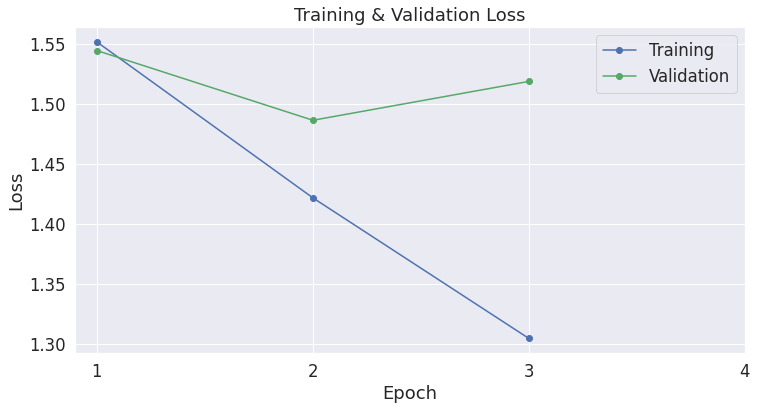

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

## Evaluation on Test Set

In [34]:
# Prediction on test set

print("Predicting labels ...")

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in test_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(input_ids=b_input_ids,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.extend(logits)
  true_labels.extend(label_ids)

print(f"Predicted {len(predictions)} samples")

Predicting labels ...
Predicted 7350 samples


In [35]:
predictions = np.argmax(predictions, axis=1)
print(f"Test set accuracy: {accuracy_score(true_labels, predictions)}")
print(f"Test set Matthews correlation coefficient: {matthews_corrcoef(true_labels, predictions)}")

Test set accuracy: 0.40435374149659864
Test set Matthews correlation coefficient: 0.22773228601040327


In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

print(f"Test set confusiomat: \n{confusion_matrix(true_labels, predictions)}")
print(f"Test set f1score: {f1_score(true_labels, predictions,average='macro')}")
print(f"Test set accuracy: {accuracy_score(true_labels, predictions)}")



Test set confusiomat: 
[[  26  307   33   93   11    6]
 [  18 1064  207  374   25    6]
 [   8  386  152  608   29    4]
 [   2  222  121 1607  106    4]
 [   3  107   96  931  118    5]
 [   1   82   59  477   47    5]]
Test set f1score: 0.2494727095286542
Test set accuracy: 0.40435374149659864


## Save model to disk

In [37]:
# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = f"./{model_name}/"

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Saving model to {output_dir}")

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
#torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to ./bert-base-uncased/


('./bert-base-uncased/tokenizer_config.json',
 './bert-base-uncased/special_tokens_map.json',
 './bert-base-uncased/vocab.txt',
 './bert-base-uncased/added_tokens.json',
 './bert-base-uncased/tokenizer.json')

In [38]:
# Copy the model files to a directory
target_dir = f"TranferBERT/"
print(output_dir)
!echo  $output_dir $target_dir
!cp -r $output_dir $target_dir

./bert-base-uncased/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
./bert-base-uncased/ TranferBERT/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


## Load Model from Drive

In [39]:

output_dir = f"TranferBERT/{model_name}/"

# Load a trained model and vocabulary that you have fine-tuned
model = AutoModelForSequenceClassification.from_pretrained(output_dir)
tokenizer = AutoTokenizer.from_pretrained(output_dir)

# Copy the model to the GPU.
model.to(device)

OSError: We couldn't connect to 'https://huggingface.co/' to load this model and it looks like TranferBERT/bert-base-uncased/ is not the path to a directory conaining a config.json file.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

## Predict on some sample text

### Prediction

In [ ]:
texts = ["ola q hace"]

In [ ]:
input_ids = []
attention_masks = []

for text in texts:
  encoded_dict = tokenizer.encode_plus(
                          text,            
                          add_special_tokens = True,
                          max_length = 64,
                          pad_to_max_length = True,
                          return_attention_mask = True,
                          return_tensors = 'pt')
  
  # Add the encoded sentence to the list.    
  input_ids.append(encoded_dict['input_ids'])

  # And its attention mask (simply differentiates padding from non-padding).
  attention_masks.append(encoded_dict['attention_mask'])

  # Convert the lists into tensors.
  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)

In [ ]:
# Put model in evaluation mode
model.eval()

predictions = []
last_layer_attentions = []

# Move input ids and attention masks to GPU
input_ids = input_ids.to(device)
attention_masks = attention_masks.to(device)

for i in range(len(input_ids)):

  ids = input_ids[i].unsqueeze(0)
  masks = attention_masks[i].unsqueeze(0)

  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(input_ids=ids,
                      attention_mask=masks)

  # Get logits and compute softmax
  logits = outputs[0]
  logits = torch.softmax(logits,dim=1)
  last_layer_attention = outputs[1][-1]
  
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  last_layer_attention = last_layer_attention.detach().cpu().numpy()

  last_layer_attentions.append(last_layer_attention)
  predictions.append(logits)

In [ ]:
probs = predictions[0][0]
print("text:", texts[0])
print("predictions:", probs)
pred_idx = np.argmax(probs)
print(f"Prediction: {label_names[pred_idx]} ({probs[pred_idx]:.2f})", )

In [ ]:
fig = plt.figure(tight_layout=True)
ax = fig.add_subplot(1, 1, 1)

y_pos = np.arange(len(label_names))
confidences = [probs[i] for i in range(len(label_names))]

ax.barh(y_pos, confidences, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(label_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Confidence')

fig.show()

### Visualize Attentions

For each token, visualize the average over all 12 heads of the last layer's attention to the special character [CLS]. The darker the background of the token, the higher its attention

In [ ]:
lla = last_layer_attentions[0][0][:,0,:]

In [ ]:
def avg_token_attentions(last_layer_attentions):
  return last_layer_attentions.mean(axis=0)

In [ ]:
avg_token_atts = avg_token_attentions(lla)
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

In [ ]:
def handle_special_token_attentions(tokens, avg_token_atts):
  new_tokens = []
  new_avg_token_atts = []
  for i in range(len(tokens)):
    if tokens[i].startswith("[") or tokens[i].startswith("##"):
      continue
    if i < tokenizer.max_len - 1 and tokens[i+1].startswith("##"):
      merged_tokens = tokens[i] + tokens[i+1][2:]
      atts = [avg_token_atts[i], avg_token_atts[i+1]]
      i += 1
      while i < tokenizer.max_len - 1 and tokens[i+1].startswith("##"):
        merged_tokens += tokens[i+1][2:]
        atts.append(avg_token_atts[i+1])
        i += 1
      new_tokens.append(merged_tokens)
      new_avg_token_atts.append(sum(atts)/len(atts))
    elif i < tokenizer.max_len - 1:
      new_tokens.append(tokens[i])
      new_avg_token_atts.append(avg_token_atts[i])
  new_avg_token_atts = new_avg_token_atts / sum(new_avg_token_atts)
  return new_tokens, new_avg_token_atts

In [ ]:
for token, att in zip(tokens, avg_token_atts):
  print(token, att)

In [ ]:
def scale_color_h_hex(c_h, scale):
    return matplotlib.colors.to_hex(
        matplotlib.colors.hsv_to_rgb((c_h, scale, 1)))

def blue_background_hex(scale):
    return scale_color_h_hex(0.625, scale)

In [ ]:
from IPython import display ,html
att_html = "<table><tr>"
for token, att in zip(tokens, avg_token_atts):
  att_html += "<td>"
  att_html += "<span style=\"background-color: " + blue_background_hex(att) + "\">" + token + "</span>"
  att_html += "</td>"
att_html += "</tr>"

In [ ]:
IPython.display.HTML(att_html) 